# Import Package

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Cleaning Data

In [7]:
df.drop(['car_ID'],axis=1,inplace=True)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
df1=df['symboling'].astype('object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [10]:
print(df['CarName'].unique())

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [11]:
#mengubah tipe mobil menjadi brand saja
def extract_brand(str):
    return str.split(' ')[0]
df['CarName'] = df['CarName'].apply(extract_brand)
print(df['CarName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [12]:
df['CarName'] = df['CarName'].replace(['maxda','nissan','porcshce','vokswagen','vw','toyouta'],
                                      ['mazda','Nissan','porsche','volkswagen','volkswagen','toyota'])
print(df['CarName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [13]:
print('fueltype      :',df['fueltype'].unique())
print('aspiration    :',df['aspiration'].unique())
print('doornumber    :',df['doornumber'].unique())
print('carbody       :',df['carbody'].unique())
print('drivewheel    :',df['drivewheel'].unique())
print('enginelocation:',df['enginelocation'].unique())
print('enginetype    :',df['enginetype'].unique())
print('cylindernumber:',df['cylindernumber'].unique())
print('fuelsystem    :',df['fuelsystem'].unique())

fueltype      : ['gas' 'diesel']
aspiration    : ['std' 'turbo']
doornumber    : ['two' 'four']
carbody       : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel    : ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
enginetype    : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem    : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [14]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Boxplot Data

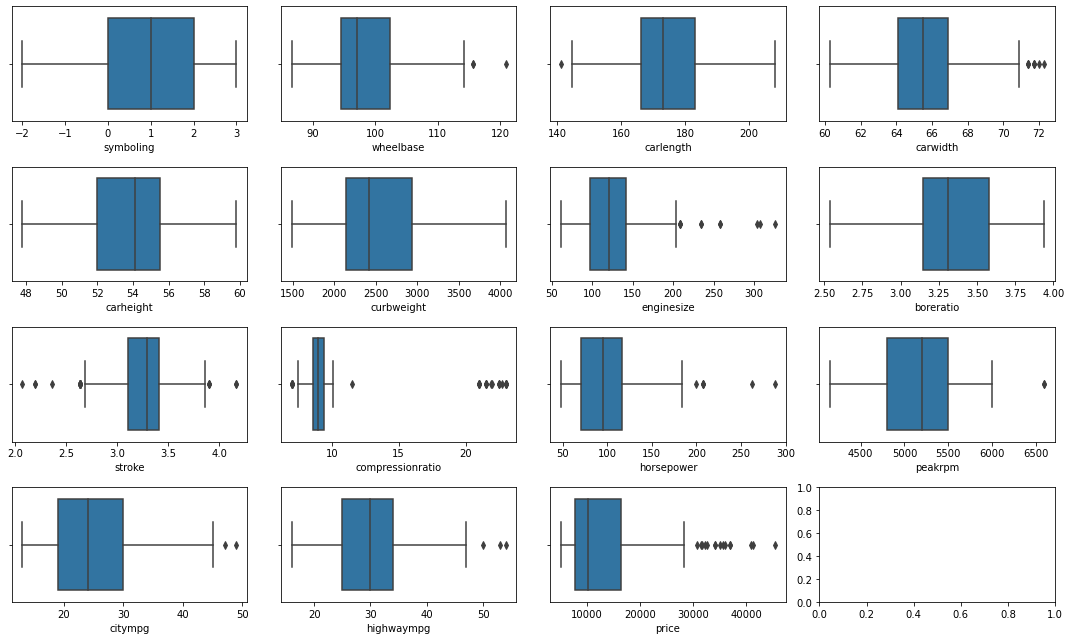

In [15]:
numeric=list(df.select_dtypes(exclude="object"))
fig, axes = plt.subplots(4,4, figsize=(15, 9))
for i, col in enumerate(numeric):        
    ax_ = sns.boxplot(x=df[col], ax=axes.flatten()[i])
plt.tight_layout()  

In [16]:
df[df['compressionratio']>11]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
63,0,mazda,diesel,std,four,sedan,fwd,front,98.8,177.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0
66,0,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.0
67,-1,buick,diesel,turbo,four,sedan,rwd,front,110.0,190.9,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552.0
68,-1,buick,diesel,turbo,four,wagon,rwd,front,110.0,190.9,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0
69,0,buick,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176.0
70,-1,buick,diesel,turbo,four,sedan,rwd,front,115.6,202.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
90,1,Nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0
108,0,peugeot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,...,152,idi,3.70,3.52,21.0,95,4150,28,33,13200.0
110,0,peugeot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,...,152,idi,3.70,3.52,21.0,95,4150,25,25,13860.0


Berdasarkan Boxplot, terlihat beberapa variabel memiliki outlier yang jaraknya cukup jauh. Namun, hal tersebut merupakan hal yang sah. Kejanggalan tersebut dapat dijelaskan dan bukan merupakan kejanggalan yang harus diperbaiki. Sebab kejanggalan tersebut memang merupakan spesifik dari mesin mobilnya

# Exploratory Data Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

#### Plot data yang memiliki type kategorik

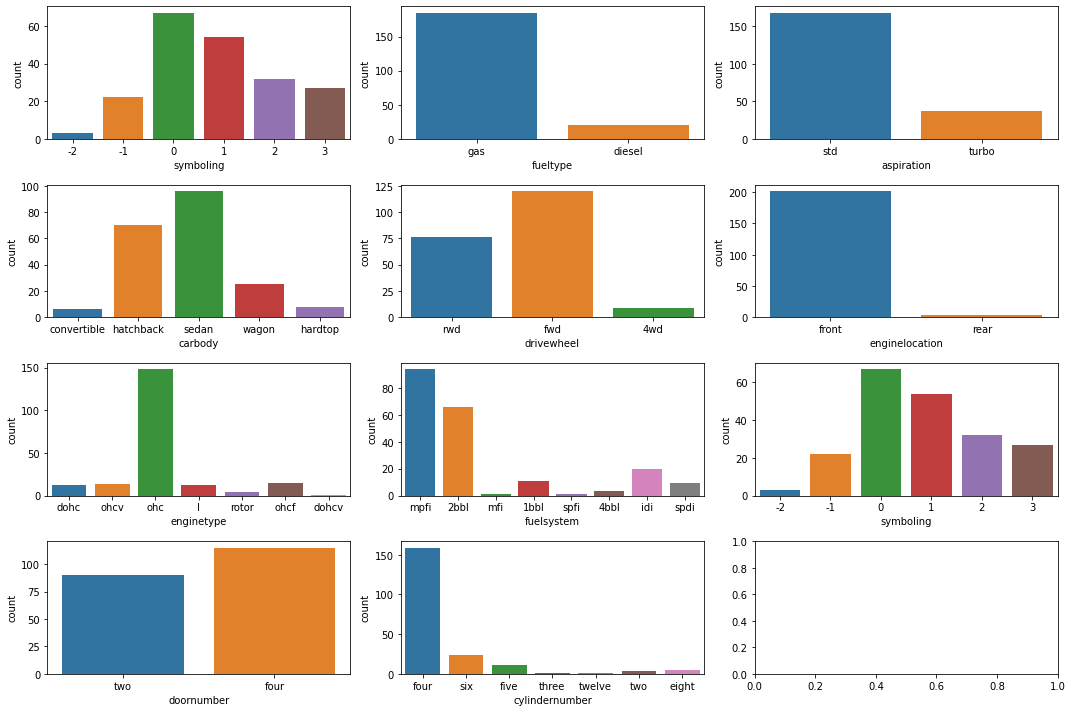

In [18]:
kategori=['symboling','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem','symboling','doornumber'
          ,'cylindernumber']
fig, axes = plt.subplots(4,3, figsize=(15,10))
for i, col in enumerate(kategori):
    column = df.columns[i+11]
    sns.countplot(x=df[col], data=df, ax = axes.flatten()[i])
plt.tight_layout() 

In [19]:
data_cat = df.select_dtypes('object')

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# create a dataframe to store label encoded values
data_cat_le = data_cat.copy()

for i in data_cat.columns:
    le.fit(data_cat[i])
    data_cat_le[i] = le.transform(data_cat[i]).copy()

from sklearn.feature_selection import SelectKBest,f_classif
y = df['price']
select = SelectKBest(f_classif)
select.fit(data_cat_le, y)

p_values = pd.Series(select.pvalues_,index = data_cat.columns)
p_values.sort_values(ascending = True)

C:\Users\Wahyu Nor Romadon\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


enginelocation    0.000000e+00
cylindernumber    7.388765e-09
fuelsystem        2.062501e-04
drivewheel        2.174127e-04
aspiration        2.833995e-04
CarName           5.611032e-03
carbody           5.629716e-03
doornumber        4.760354e-02
fueltype          1.973501e-01
enginetype        3.512990e-01
dtype: float32

In [54]:
df.groupby(['CarName', 'symboling', 'cylindernumber'])['price'].mean()

CarName     symboling  cylindernumber
Nissan       0         four               9249.000000
                       six               13799.000000
             1         four               7115.666667
                       six               18399.000000
             2         four               8249.000000
                                             ...     
volkswagen   2         four               8560.714286
             3         four              10787.500000
volvo       -2         four              15781.666667
            -1         four              17899.166667
                       six               21977.500000
Name: price, Length: 70, dtype: float64

## Data Numeric

### Statistik Deskriptif

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


### Korelasi

In [22]:
df.corr('spearman')

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.537958,-0.396365,-0.253528,-0.523124,-0.256490,-0.176542,-0.169593,-0.018651,0.023008,-0.009954,0.282124,-0.018317,0.053316,-0.144684
wheelbase,-0.537958,1.000000,0.912391,0.812300,0.632947,0.765291,0.648305,0.537088,0.226897,-0.126268,0.505204,-0.311853,-0.492849,-0.538680,0.681773
carlength,-0.396365,0.912391,1.000000,0.888201,0.525148,0.890415,0.782616,0.638926,0.187107,-0.192663,0.660552,-0.269277,-0.670013,-0.697949,0.804316
carwidth,-0.253528,0.812300,0.888201,1.000000,0.350279,0.863815,0.770615,0.610196,0.240105,-0.145537,0.688964,-0.199279,-0.687690,-0.700999,0.811401
carheight,-0.523124,0.632947,0.525148,0.350279,1.000000,0.345852,0.199811,0.215890,-0.018107,0.000231,0.010583,-0.296291,-0.068625,-0.132512,0.242769
curbweight,-0.256490,0.765291,0.890415,0.863815,0.345852,1.000000,0.877739,0.701820,0.162728,-0.219100,0.807715,-0.236111,-0.812947,-0.834385,0.909067
enginesize,-0.176542,0.648305,0.782616,0.770615,0.199811,0.877739,1.000000,0.701457,0.291608,-0.234636,0.816750,-0.272984,-0.730056,-0.721342,0.825996
boreratio,-0.169593,0.537088,0.638926,0.610196,0.215890,0.701820,0.701457,1.000000,-0.082762,-0.160407,0.639372,-0.298135,-0.608718,-0.614886,0.643772
stroke,-0.018651,0.226897,0.187107,0.240105,-0.018107,0.162728,0.291608,-0.082762,1.000000,-0.070313,0.130040,-0.073857,-0.030355,-0.030437,0.111343
compressionratio,0.023008,-0.126268,-0.192663,-0.145537,0.000231,-0.219100,-0.234636,-0.160407,-0.070313,1.000000,-0.353211,-0.022029,0.478857,0.445102,-0.173646


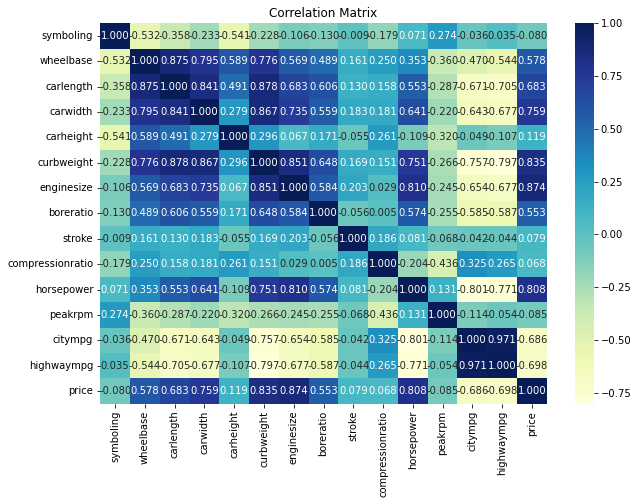

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(data = df.corr(), annot=True,cmap='YlGnBu', fmt=".3f").set_title("Correlation Matrix")
plt.show()

Dapat disimpulkan dari heatmap diatas bahwasannya kolom 'enginesize' memiliki korelasi paling tinggi dengan kolom price daripada kolom yang lain yaitu sebesar 0.874

### Scatter Plot

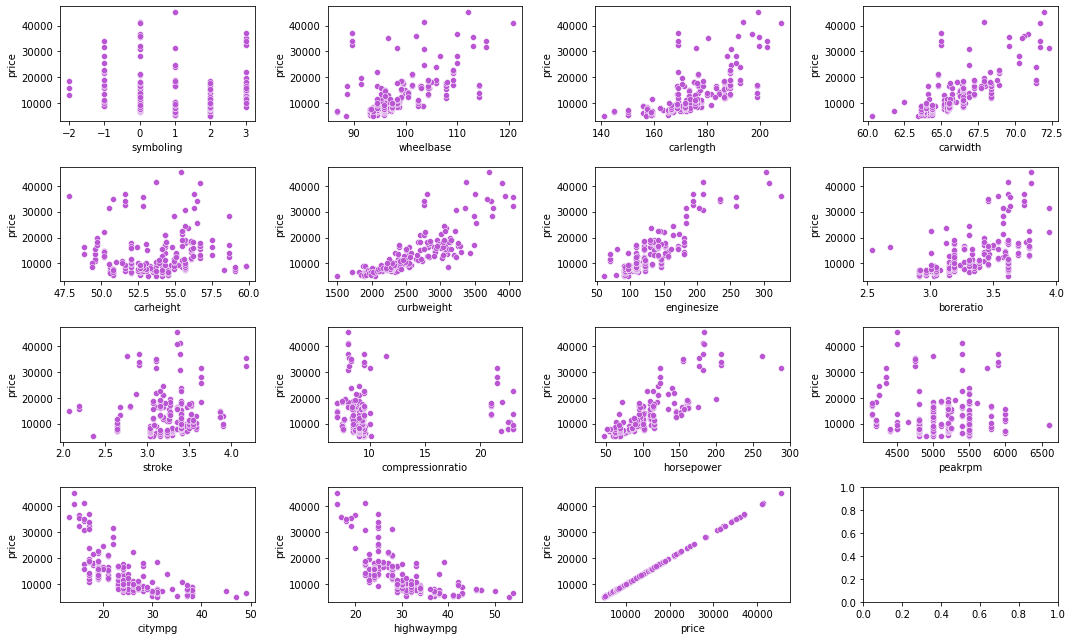

In [24]:
fig, axes = plt.subplots(4,4, figsize=(15, 9))
for i, col in enumerate(numeric):        
    ax_ = sns.scatterplot(data = df, x=df[col], y='price',color='mediumorchid', ax=axes.flatten()[i])
plt.tight_layout() 

Berdasarkan koefisien korelasi yang didapatkan pada heat map, variabel enginesize dengan price memiliki nilai korelasi tertinggi  sebesar 0.874. Hal ini dapat dilihat pula pada scatterplot variabel tersebut yang memiliki visualisasi sebaran data yang membentuk pola garis lurus dengan korelasi positif. Dimana ketika enginesize meningkat, maka harga mobil juga akan meningkat.

Variabel-variabel yang tampak dikatakan sebagai faktor yang dapat membedakan mobil ‘murah’ dan mobil ‘mahal’
- Variabel dengan korelasi positif : wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, dan horsepower
- Variabel dengan korelasi negatif : citympg dan highwaympg

Untuk variabel lainnya, dapat dilihat memiliki korelasi yang relatif sangat kecil dan pada scatter plot sebaran data yang ada tidak menunjukkan suatu pola atau dapat dikatakan memiliki sebaran acak. Sehingga diasumsikan variabel tidak dapat dikatakan sebagai faktor yang dapat membedakan mobil ‘murah’ dan mobil ‘mahal’

# Modelling

In [25]:
#One Hot Encoding
baseline=pd.get_dummies(df,drop_first=True)
baseline.head(10)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
5,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,...,0,0,0,0,0,0,0,1,0,0
6,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,...,0,0,0,0,0,0,0,1,0,0
7,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,...,0,0,0,0,0,0,0,1,0,0
8,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,...,0,0,0,0,0,0,0,1,0,0
9,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,...,0,0,0,0,0,0,0,1,0,0


## Baseline

In [26]:
X = baseline.drop(['price'], axis=1)
y = baseline['price']

In [27]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

In [28]:
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)

Coefficients:  [ 1.36836603e+02  3.22987462e+02 -1.93986141e+02  8.61577961e+02
 -1.34194310e+02  3.46535788e+00  9.33778922e+01 -3.36846972e+03
 -1.78400057e+03 -1.01543277e+03  4.06270264e+00  1.79312460e+00
  4.19161763e+01  1.07519969e+01  3.43770767e+03  3.23002531e+03
  7.81090777e+03  5.78737221e+03 -2.19692725e+03 -2.39147694e+03
  1.37036814e+03 -5.22753822e+02  5.05704444e+03  4.35637492e+02
 -9.50295996e+02 -2.54539389e+03 -1.73685098e+03 -2.16767018e+03
  6.27173130e+03  5.27084113e+02  3.72783671e+03 -4.19479953e+03
 -1.09291612e+03  4.47792915e+02  5.40466821e+02 -8.52301450e+03
  1.37511594e+03 -1.35965206e+03 -1.45151576e+03 -1.93555363e+03
 -1.62422302e+03 -1.78463444e+03 -5.24644289e+02  6.18007604e+02
  7.67140973e+03 -3.13128784e+03 -1.73685098e+03 -1.30195129e+02
  3.47661020e+03 -2.06806516e+03  1.74240752e+03 -4.47663275e+03
 -1.96080989e+03 -2.96098206e+03  4.54747351e-13 -4.60162684e+03
  1.74240752e+03  3.33777632e+03  1.74240752e+03  8.52301450e+03
  0.000000

In [29]:
y_pred = reg.predict(X_test)

In [31]:
# MAE
from sklearn.metrics import mean_absolute_error
print("MAE :",mean_absolute_error(y_test, y_pred))
# MSE
from sklearn.metrics import mean_squared_error
print("MSE :",mean_squared_error(y_test, y_pred))
# RMSE
from sklearn.metrics import mean_squared_error
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))
# R2
from sklearn.metrics import r2_score
print("R2 :",r2_score(y_test, y_pred))

MAE : 1575.8689932307564
MSE : 5558586.85531815
RMSE : 2357.665552048922
R2 : 0.9079256289634281


In [32]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Linear, Ridge, Lasso Regression

In [33]:
reg=df.drop(['stroke'],axis=1)
reg

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,six,173,mpfi,3.58,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,six,145,idi,3.01,23.0,106,4800,26,27,22470.0


In [34]:
#One Hot Encoding
reglin=pd.get_dummies(reg,drop_first=True)
reglin.head(10)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,8.0,115,...,0,0,0,0,0,0,0,1,0,0
5,2,99.8,177.3,66.3,53.1,2507,136,3.19,8.5,110,...,0,0,0,0,0,0,0,1,0,0
6,1,105.8,192.7,71.4,55.7,2844,136,3.19,8.5,110,...,0,0,0,0,0,0,0,1,0,0
7,1,105.8,192.7,71.4,55.7,2954,136,3.19,8.5,110,...,0,0,0,0,0,0,0,1,0,0
8,1,105.8,192.7,71.4,55.9,3086,131,3.13,8.3,140,...,0,0,0,0,0,0,0,1,0,0
9,0,99.5,178.2,67.9,52.0,3053,131,3.13,7.0,160,...,0,0,0,0,0,0,0,1,0,0


In [35]:
X = reglin.loc[:, reglin.columns != 'price']
y = reglin['price']

In [36]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [37]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

C:\Users\Wahyu Nor Romadon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130993995.65392774, tolerance: 923825.4868066212
  model = cd_fast.enet_coordinate_descent(


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t\t MSE \t\t MAE \t\t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 			 MSE 		 MAE 			 R2
LinearRegression 	 2351.68 		 5530376.55 	1548.67 		0.91
LassoRegression 	 2428.59 		 5898063.30 	1535.67 		0.90
RidgeRegression 	 2367.55 		 5605312.34 	1588.88 		0.91


# Random Forest

Model				 RMSE 			 MSE 			 MAE 			 R2
Random Forest Regressor 	 2035.60 		 4143670.79 		1355.98 		0.93


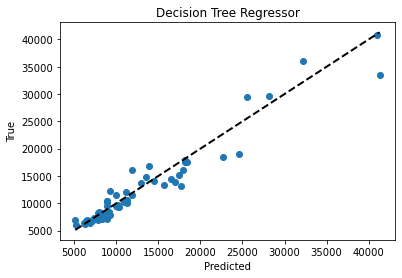

In [39]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t\t MSE \t\t\t MAE \t\t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor()

In [41]:
X = reglin.loc[:, reglin.columns != 'price']
y = reglin['price']

In [42]:
from sklearn.metrics import mean_squared_error as mse

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

In [44]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = np.sqrt(mse(y_test, rf_pred))
print('Model has RMSE:', rf_rmse)
print('Model has R2-Score:', r2_score(y_test, rf_pred))

Model has RMSE: 2228.0137444464076
Model has R2-Score: 0.9096633738943312


# Decision Tree

Model				 RMSE 			 MSE 			 MAE 			 R2
Decision Tree Regressor 	 2543.60 		 6469907.88 		1567.63 		0.88


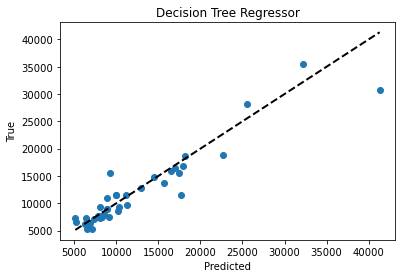

In [45]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t\t MSE \t\t\t MAE \t\t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [48]:
y_pred = dt.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))

R-squared: 0.8277436474687262


Berdasarkan pemodelan diatas, model terbaik adalah Random Forest dengan R2-Score sebesar 0.9217805119060181

## Random Forest Tuning

In [49]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [50]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, cv = 5, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True, verbose=3)

In [51]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [52]:
new_rf_pred = rf_random.best_estimator_.predict(X_test)
new_rf_rmse = np.sqrt(mse(y_test, new_rf_pred))
print('New Model has RMSE:', new_rf_rmse)
print('New Model has R2-Score:', r2_score(y_test, new_rf_pred))

New Model has RMSE: 2446.202756393957
New Model has R2-Score: 0.891103721626432


Hyperparameter tuning pada Random Forest tidak membuat model menjadi lebih baik

Jadi, dapat disimpulkan model terbaik menggunakan Random Forest dengan parameter :

In [53]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Karena dari 5 model yang ada, model Random Forest memiliki nilai R2-Score tertinggi dibandingkan model lainnya